# 공백으로 image split
- 같은 색상이 x좌표에 나오는게 80줄 이상이면 이 점을 기준으로 split
- 

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [71]:
img_color = cv2.imread('./image/size_table2.jpg')
img = cv2.imread('./image/size_table2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, img_binary = cv2.threshold(img, 127, 255, 0)

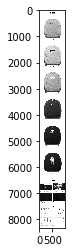

In [76]:
plt.imshow(img, 'gray')

In [135]:
def split_img(img):
    y_shape = img.shape[0]
    x_shape = img.shape[1]
    
    ck_color = 0
    split_point_y = []
    for i in range(y_shape):
        for j in range(0, x_shape, 20):
            # x좌표 첫번쨰의 color
            if img[i][0] == img[i][j]:
                ck_color += 1
            else :
                ck_color = 0
                break; 
        if ck_color > ((x_shape/20) * 80):
            split_point_y.append(i)
            ck_color = 0

    split_img_list = []

    start = 0
    for point in split_point_y:
        split_img_list.append(img[start:point][:])
        start = point
    split_img_list.append(img[start:][:])
    
    print('len(split_point_y) : {} '.format(len(split_point_y)))
    print('len(split_img_list) : {} '.format(len(split_img_list)))
    
    return split_img_list


In [137]:
splt_img_list = split_img(img)

len(split_point_y) : 16 
len(split_img_list) : 17 


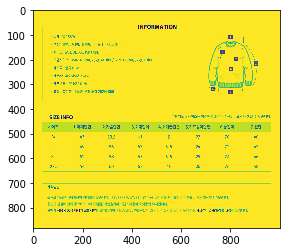

In [138]:
plt.imshow(split_img_list[-1])

In [103]:
len(split_point_y)

16

In [61]:
img_binary.shape

(8330, 1000)

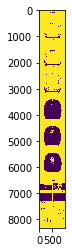

In [62]:
plt.imshow(img_binary)

In [63]:
contours, hierachy = cv2.findContours(img_binary,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [64]:
len(contours)

6193

In [65]:
for cnt in contours:
    rect = cv.minAreaRect(cnt)
    box = cv.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours(img_color,[box],0,(0,0,255),2)

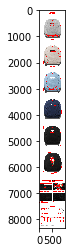

In [68]:
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))

In [70]:
cv2.imwrite('checking_img.png',img_color)

True

In [37]:
contours, _ = cv2.findContours(img_binary,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

error: OpenCV(4.1.0) C:\projects\opencv-python\opencv\modules\imgproc\src\contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


error: OpenCV(4.1.0) C:\projects\opencv-python\opencv\modules\imgproc\src\contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


In [17]:
cv2.findContours(img_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

TypeError: Expected cv::UMat for argument 'image'

In [ ]:


img_color = cv.imread('test.png')
img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
ret, img_binary = cv.threshold(img_gray, 127, 255, 0)
contours, hierarchy = cv.findContours(img_binary, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)


for cnt in contours:
    cv.drawContours(img_color, [cnt], 0, (255, 0, 0), 3)  # blue

cv.imshow("result", img_color)

cv.waitKey(0)


for cnt in contours:

    x, y, w, h = cv.boundingRect(cnt)
    cv.rectangle(img_color, (x, y), (x + w, y + h), (0, 255, 0), 2)


cv.imshow("result", img_color)

cv.waitKey(0)



for cnt in contours:

    rect = cv.minAreaRect(cnt)
    box = cv.boxPoints(rect)
    box = np.int0(box)
    cv.drawContours(img_color,[box],0,(0,0,255),2)


cv.imshow("result", img_color)

cv.waitKey(0)